<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

(1) Features (text representation) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [28]:
# Write your code here
from google.colab import files
uploaded = files.upload()

Saving Assignment3_dataset.csv to Assignment3_dataset.csv


In [50]:
# Reading dataset
import pandas as pd
data=pd.read_csv('Assignment3_dataset.csv')
print(data.shape)

(108, 4)


In [45]:
#Data Cleaning
import nltk 
data['Cleaned Data'] = data['Cleaned Data'].str.replace('[^\w\s]','')  #removal of punctuation
data['Cleaned Data'] = data['Cleaned Data'].apply(lambda x: " ".join(x.lower() for x in x.split()))#lower case
from nltk.corpus import stopwords #removal of stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
data['Cleaned Data'] = data['Cleaned Data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

<ipython-input-45-084263c79572>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Cleaned Data'] = data['Cleaned Data'].str.replace('[^\w\s]','')  #removal of punctuation
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
#Building document-term matrix
words = []   
from nltk.tokenize import RegexpTokenizer
from gensim import corpora,models
tokenizer = RegexpTokenizer(r'\w+')
for x in pd.Series(data['Cleaned Data']):
  a = tokenizer.tokenize(x)
  words.append(a)
dictionary = corpora.Dictionary(words)
corpus = [dictionary.doc2bow(word) for word in words]
#LDA model
import gensim 
model = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word = dictionary,passes = 20)
print(model.print_topics(num_topics = 10, num_words = 5))

[(0, '0.033*"movi" + 0.014*"phoenix" + 0.014*"get" + 0.012*"joaquin" + 0.010*"need"'), (1, '0.023*"joke" + 0.022*"movi" + 0.011*"phoenix" + 0.010*"film" + 0.009*"say"'), (2, '0.015*"film" + 0.015*"one" + 0.011*"movi" + 0.011*"feel" + 0.007*"act"'), (3, '0.044*"movi" + 0.025*"joke" + 0.012*"like" + 0.010*"good" + 0.009*"film"'), (4, '0.026*"film" + 0.023*"movi" + 0.014*"peopl" + 0.012*"joke" + 0.012*"best"'), (5, '0.009*"act" + 0.007*"perform" + 0.007*"part" + 0.007*"movi" + 0.006*"charact"'), (6, '0.028*"joke" + 0.011*"say" + 0.011*"better" + 0.007*"movi" + 0.007*"peopl"'), (7, '0.026*"feel" + 0.009*"know" + 0.008*"build" + 0.008*"transform" + 0.008*"wish"'), (8, '0.021*"movi" + 0.017*"watch" + 0.016*"made" + 0.015*"joke" + 0.014*"film"'), (9, '0.018*"joke" + 0.012*"movi" + 0.011*"watch" + 0.010*"go" + 0.010*"film"')]


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [36]:
# Write your code here
data.head(10)

,Doc_Id,Review,Cleaned Data,Sentimental Analysis
0,Review 1,"Every once in a while a movie comes, that trul...",everi movi come truli make impact joaquin perf...,Positive
1,Review 2,This is a movie that only those who have felt ...,movi felt alon isol truli relat understand mot...,Positive
2,Review 3,"Truly a masterpiece, The Best Hollywood film o...",truli masterpiec best hollywood film 2019 one ...,Positive
3,Review 4,Joaquin Phoenix gives a tour de force performa...,joaquin phoenix give tour de forc perform fear...,Neutral
4,Review 5,Most of the time movies are anticipated like t...,time move anticip like end fall short way shor...,Negative
5,Review 6,Let me start off by saying if Joaquin Phoneix ...,let start say joaquin phoenix get oscar movi s...,Positive
6,Review 7,I get why some people hate this . It's because...,get peopl hate polit messag peopl think need g...,Positive
7,Review 8,I have seen Joker yesterday at Venice an early...,seen joke yesterday venic earli inflat screen ...,Positive
8,Review 9,It's sad that Joaquin missed Oscar for 'The gl...,sad joaquin miss oscar gladiat compel villain ...,Positive
9,Review 10,This movie causes the audience to consider man...,movi caus audienc consid mani topic moral part...,Positive


In [37]:
data['Sentimental Analysis'].value_counts()

Positive    61
Negative    34
Neutral     13
Name: Sentimental Analysis, dtype: int64

In [38]:
import nltk
data['Cleaned Data'] = data['Cleaned Data'].str.replace('[^\w\s]','')  #removal of punctuation
data['Cleaned Data'] = data['Cleaned Data'].apply(lambda x: " ".join(x.lower() for x in x.split()))#lower case
from nltk.corpus import stopwords #removal of stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
data['Cleaned Data'] = data['Cleaned Data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

<ipython-input-38-cfdffeff464f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Cleaned Data'] = data['Cleaned Data'].str.replace('[^\w\s]','')  #removal of punctuation
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
data.head(10)

,Doc_Id,Review,Cleaned Data,Sentimental Analysis
0,Review 1,"Every once in a while a movie comes, that trul...",everi movi come truli make impact joaquin perf...,Positive
1,Review 2,This is a movie that only those who have felt ...,movi felt alon isol truli relat understand mot...,Positive
2,Review 3,"Truly a masterpiece, The Best Hollywood film o...",truli masterpiec best hollywood film 2019 one ...,Positive
3,Review 4,Joaquin Phoenix gives a tour de force performa...,joaquin phoenix give tour de forc perform fear...,Neutral
4,Review 5,Most of the time movies are anticipated like t...,time move anticip like end fall short way shor...,Negative
5,Review 6,Let me start off by saying if Joaquin Phoneix ...,let start say joaquin phoenix get oscar movi s...,Positive
6,Review 7,I get why some people hate this . It's because...,get peopl hate polit messag peopl think need g...,Positive
7,Review 8,I have seen Joker yesterday at Venice an early...,seen joke yesterday venic earli inflat screen ...,Positive
8,Review 9,It's sad that Joaquin missed Oscar for 'The gl...,sad joaquin miss oscar gladiat compel villain ...,Positive
9,Review 10,This movie causes the audience to consider man...,movi caus audienc consid mani topic moral part...,Positive


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Doc_Id                108 non-null    object
 1   Review                108 non-null    object
 2   Cleaned Data          108 non-null    object
 3   Sentimental Analysis  108 non-null    object
dtypes: object(4)
memory usage: 3.5+ KB


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf= TfidfVectorizer(ngram_range=(1,2), max_features=1000)
tf_idf.fit(data['Cleaned Data'])
x_values =  tf_idf.transform(data['Cleaned Data'])
y_values = data['Sentimental Analysis']


# Split the training data to training and validating data
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_values, y_values, test_size = 0.2)

In [42]:
from sklearn import metrics

def evaluation(y_pred, y_test):
    Accuracy = metrics.accuracy_score(y_pred, y_test)
    Recall = metrics.recall_score(y_pred = y_pred, y_true = y_test, pos_label='positive', average='micro') # micro calculates total true positives, false negatives and false positives
    Precision = metrics.precision_score(y_pred = y_pred, y_true = y_test, pos_label='positive', average='micro') # micro calculates total true positives, false negatives and false positives
    F1 = 2 * (Precision * Recall) / (Precision + Recall) # Formula for F1 Score
    print("Accuracy: ", Accuracy.round(4))
    print("Recall:", Recall.round(4))
    print("Precision:", Precision.round(4))
    print("F-1 score:", F1.round(4))

In [43]:
from sklearn import naive_bayes
from sklearn.model_selection import cross_val_score, KFold

naive_bayes_implement = naive_bayes.MultinomialNB()

naive_bayes_implement.fit(x_train,y_train)

y_pred_valid = naive_bayes_implement.predict(x_valid)
evaluation(y_pred_valid, y_valid)
print("Cross Validation Score:", cross_val_score(naive_bayes_implement, x_valid, y_valid, cv= KFold(10, shuffle=True, random_state = 22)))

Accuracy:  0.4091
Recall: 0.4091
Precision: 0.4091
F-1 score: 0.4091
Cross Validation Score: [0.66666667 0.33333333 0.         1.         0.         0.
 0.         0.         1.         1.        ]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [44]:
from sklearn import svm

svm_implement = svm.SVC()

svm_implement.fit(x_train,y_train)

y_pred_valid = svm_implement.predict(x_valid)
evaluation(y_pred_valid, y_valid)
print("Cross Validation Score:", cross_val_score(svm_implement, x_valid, y_valid, cv= KFold(10, shuffle=True, random_state = 22)).mean().round(4))

Accuracy:  0.4091
Recall: 0.4091
Precision: 0.4091
F-1 score: 0.4091
Cross Validation Score: 0.35


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [5]:
# Write your code here
from google.colab import files
uploaded = files.upload()



Saving train.csv to train.csv


In [6]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df_train = pd.read_csv("test.csv")
df_test = pd.read_csv("train.csv")

In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [61]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [62]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [63]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


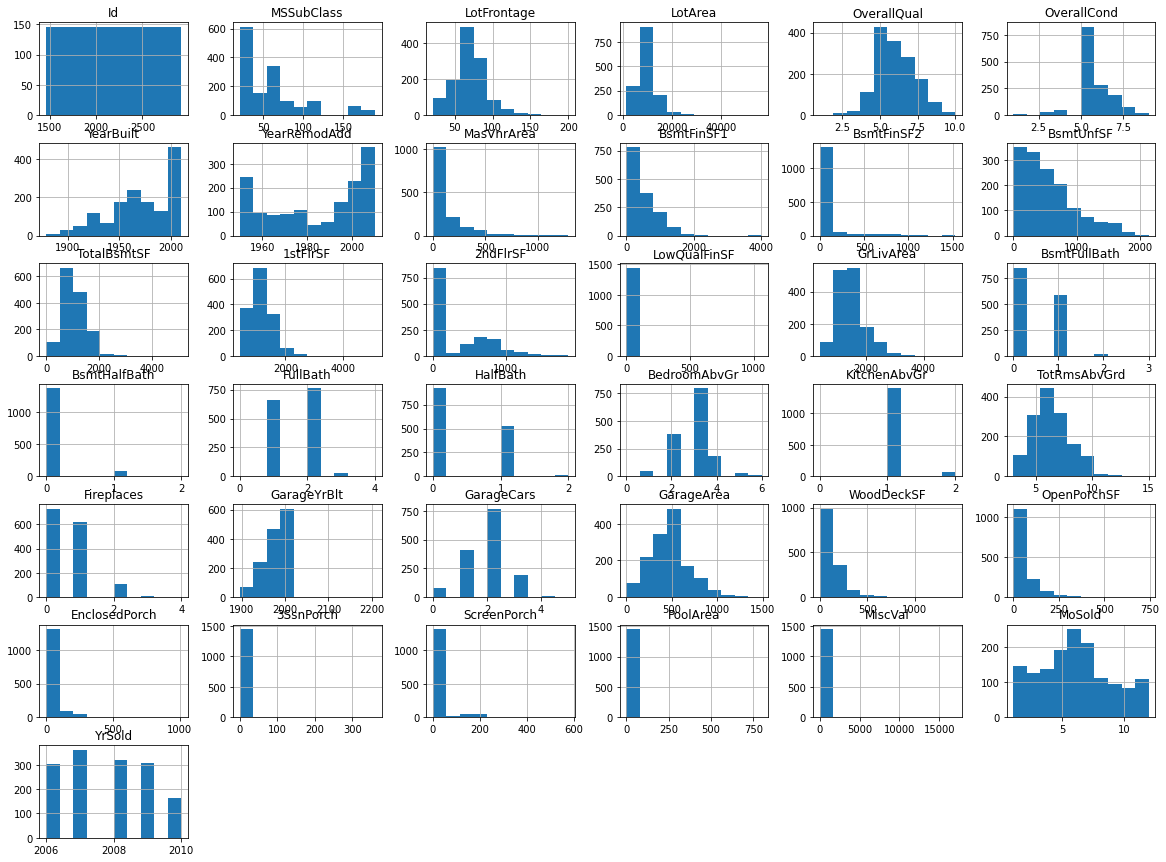

In [66]:
df_train.hist(bins=10, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
df_train = df_train.select_dtypes(include=['number']).interpolate().dropna()
df_test = df_test.select_dtypes(include=['number']).interpolate().dropna()
x_training_data = df_test.drop(['SalePrice','Id'], axis=1)
y_training_data = np.log(df_test.SalePrice)
x_train, x_test, y_train, y_test = train_test_split(x_training_data,y_training_data,random_state = 21, test_size=0.2)
regression = LinearRegression()
regression.fit(x_train,y_train)
y_pred = regression.predict(x_test)
print('Linear Regression R-squared": %.4f' % regression.score(x_test, y_test))

Linear Regression R-squared": 0.8493


In [68]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin)
print(lin_rmse)

195747.2801595323


In [69]:
results = {"Predicted Prices":np.exp(y_pred),"Actual Prices":np.exp(y_test)}
df_val = pd.DataFrame(results)
df_val["Percentage Difference"] = round(abs((df_val["Predicted Prices"] - df_val["Actual Prices"]) / df_val["Actual Prices"]) * 100,2)
df_val

,Predicted Prices,Actual Prices,Percentage Difference
880,156677.762126,157000.0,0.21
605,229973.921577,205000.0,12.18
1166,245358.948864,245350.0,0.00
216,218109.586021,210000.0,3.86
970,86909.329260,135000.0,35.62
...,...,...,...
218,231419.797074,311500.0,25.71
1228,311321.804719,367294.0,15.24
1007,93234.996099,88000.0,5.95
575,109041.447359,118500.0,7.98
